In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asjad99/mimiciii")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mimiciii' dataset.
Path to dataset files: /kaggle/input/mimiciii


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/OUTPUTEVENTS.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/D_LABITEMS.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/DRGCODES.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/SHA256SUMS.txt
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/D_ICD_DIAGNOSES.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/DATETIMEEVENTS.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/CAREGIVERS.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/INPUTEVENTS_MV.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/CHARTEVENTS.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/PRESCRIPTIONS.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/D_ICD_PROCEDURES.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/PATIENTS.csv
/kaggle/input/mimiciii/mimic-iii-clinical-database-demo-1.4/TRANSFERS.csv
/kagg

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pathlib
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

data_dir = pathlib.Path("/root/.cache/kagglehub/datasets/asjad99/mimiciii/versions/1/mimic-iii-clinical-database-demo-1.4")
file_paths = {
    'admissions': data_dir / 'ADMISSIONS.csv',
    'patients': data_dir / 'PATIENTS.csv',
    'icustays': data_dir / 'ICUSTAYS.csv',
    'diagnoses': data_dir / 'DIAGNOSES_ICD.csv',
    'procedures': data_dir / 'PROCEDURES_ICD.csv',
    'outputevents': data_dir / 'OUTPUTEVENTS.csv',
    'inputevents_mv': data_dir / 'INPUTEVENTS_MV.csv',
    'inputevents_cv': data_dir / 'INPUTEVENTS_CV.csv',
    'labevents': data_dir / 'LABEVENTS.csv',
    'chartevents': data_dir / 'CHARTEVENTS.csv'
}

def load_csv(file_path, chunksize=None):
    if chunksize:
        return pd.concat(pd.read_csv(file_path, chunksize=chunksize, low_memory=False))
    else:
        return pd.read_csv(file_path, low_memory=False)

admissions = load_csv(file_paths['admissions'])
patients = load_csv(file_paths['patients'])
icustays = load_csv(file_paths['icustays'])
diagnoses = load_csv(file_paths['diagnoses'])
procedures = load_csv(file_paths['procedures'])
outputevents = load_csv(file_paths['outputevents'])
inputevents_mv = load_csv(file_paths['inputevents_mv'])
inputevents_cv = load_csv(file_paths['inputevents_cv'])
labevents = load_csv(file_paths['labevents'], chunksize=1000000)
chartevents = load_csv(file_paths['chartevents'], chunksize=1000000)

print("All key files loaded successfully.")

All key files loaded successfully.


In [ ]:

def basic_eda(df, name):
    print(f"\n--- EDA for {name} ---")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print("Head:\n", df.head())
    print("Describe:\n", df.describe(include='all'))
    print("Info:")
    df.info()
    print("Missing Values:\n", df.isnull().sum())

basic_eda(admissions, 'ADMISSIONS')
# basic_eda(patients, 'PATIENTS')
# basic_eda(icustays, 'ICUSTAYS')
# basic_eda(diagnoses, 'DIAGNOSES_ICD')
# basic_eda(procedures, 'PROCEDURES_ICD')
# basic_eda(outputevents, 'OUTPUTEVENTS')
# basic_eda(inputevents_mv, 'INPUTEVENTS_MV')
# basic_eda(inputevents_cv, 'INPUTEVENTS_CV')

labevents_sample = load_csv(file_paths['labevents']).head(10000)
chartevents_sample = load_csv(file_paths['chartevents']).head(10000)
# basic_eda(labevents_sample, 'LABEVENTS (Sample)')
# basic_eda(chartevents_sample, 'CHARTEVENTS (Sample)')


--- EDA for ADMISSIONS ---
Shape: (129, 19)
Columns: ['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime', 'admission_type', 'admission_location', 'discharge_location', 'insurance', 'language', 'religion', 'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis', 'hospital_expire_flag', 'has_chartevents_data']
Head:
    row_id  subject_id  hadm_id            admittime            dischtime  \
0   12258       10006   142345  2164-10-23 21:09:00  2164-11-01 17:15:00   
1   12263       10011   105331  2126-08-14 22:32:00  2126-08-28 18:59:00   
2   12265       10013   165520  2125-10-04 23:36:00  2125-10-07 15:13:00   
3   12269       10017   199207  2149-05-26 17:19:00  2149-06-03 18:42:00   
4   12270       10019   177759  2163-05-14 20:43:00  2163-05-15 12:00:00   

             deathtime admission_type         admission_location  \
0                  NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1  2126-08-28 18:59:00      EMERGENCY  TRANSFER FROM H

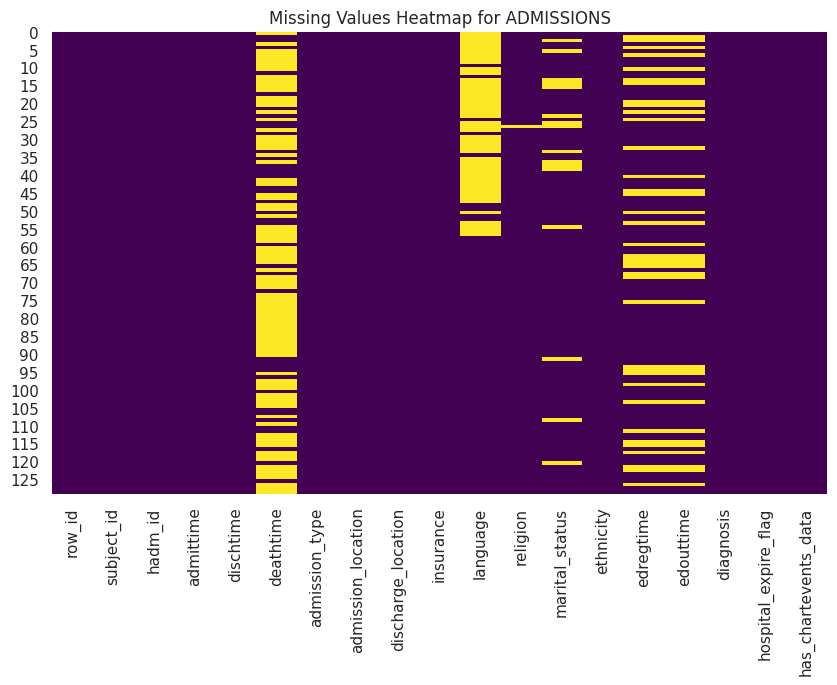

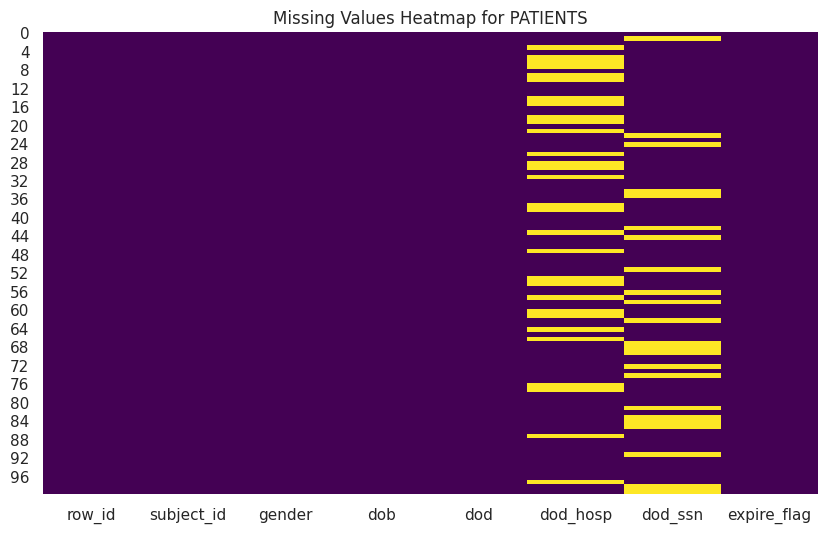

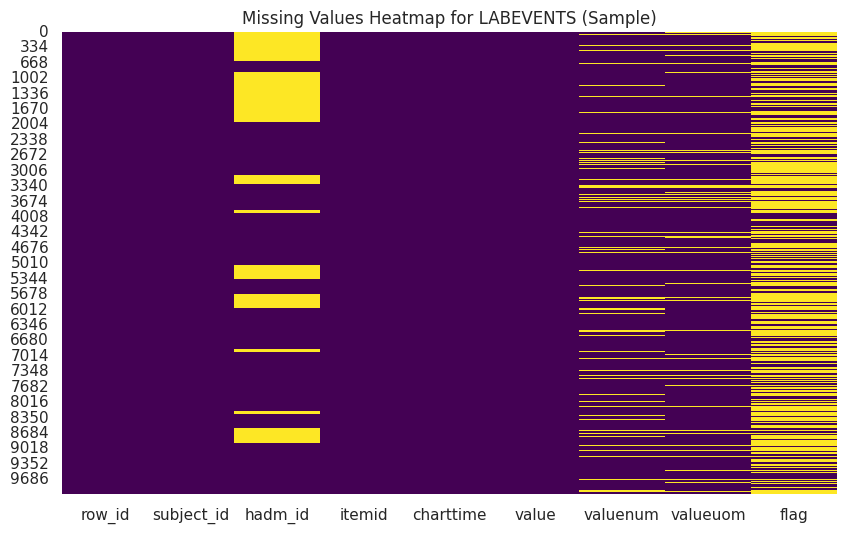

In [ ]:

def plot_missing_values(df, name):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(f"Missing Values Heatmap for {name}")
    plt.show()

plot_missing_values(admissions, 'ADMISSIONS')
plot_missing_values(patients, 'PATIENTS')

plot_missing_values(labevents_sample, 'LABEVENTS (Sample)')


In [ ]:
from dataclasses import dataclass
import pandas as pd
import logging
from datetime import datetime
from typing import Optional

# 设置日志
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

@dataclass
class AgeCalculator:


    patients_df: pd.DataFrame
    admissions_df: pd.DataFrame

    def __post_init__(self):
        self.patients_df['dob'] = pd.to_datetime(self.patients_df["dob"], errors='coerce')
        self.admissions_df['admittime'] = pd.to_datetime(self.admissions_df['admittime'], errors='coerce')

    def calculate_age(self, subject_id: int, hadm_id: int) -> Optional[float]:

        try:
            dob = self.patients_df[self.patients_df['subject_id'] == subject_id]['dob'].iloc[0]
            admittime = self.admissions_df[self.admissions_df['hadm_id'] == hadm_id]['admittime'].iloc[0]

            if pd.isna(dob) or pd.isna(admittime):
                logger.warning(f"Missing DOB or ADMITTIME for SUBJECT_ID={subject_id}, HADM_ID={hadm_id}")
                return None

            dob_dt = dob.to_pydatetime()
            admittime_dt = admittime.to_pydatetime()

            year_diff = admittime_dt.year - dob_dt.year
            if year_diff > 150:
                logger.info(f"Age > 150 for SUBJECT_ID={subject_id}, setting to 90")
                return 90.0

            age = (admittime_dt - dob_dt).days / 365.25

            if age < 0:
                logger.warning(f"Negative age ({age}) for SUBJECT_ID={subject_id}, HADM_ID={hadm_id}")
                return None

            return age
        except IndexError:
            logger.error(f"No data for SUBJECT_ID={subject_id}, HADM_ID={hadm_id}")
            return None
        except Exception as e:
            logger.error(f"Error calculating age for SUBJECT_ID={subject_id}, HADM_ID={hadm_id}: {str(e)}")
            return None

    def add_age_to_admissions(self) -> pd.DataFrame:

        result = self.admissions_df.copy()
        result['age'] = result.apply(
            lambda row: self.calculate_age(row['subject_id'], row['hadm_id']), axis=1
        )
        return result

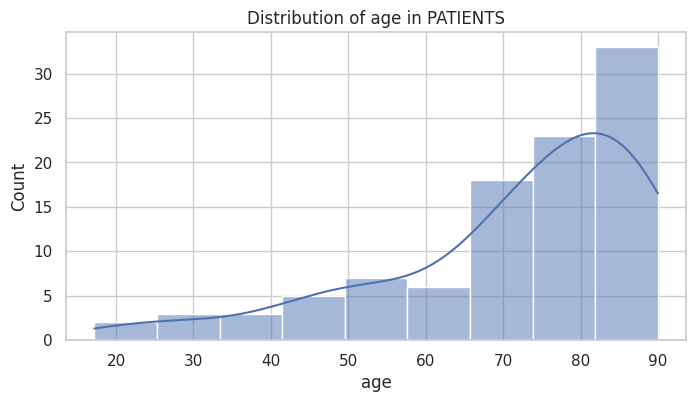

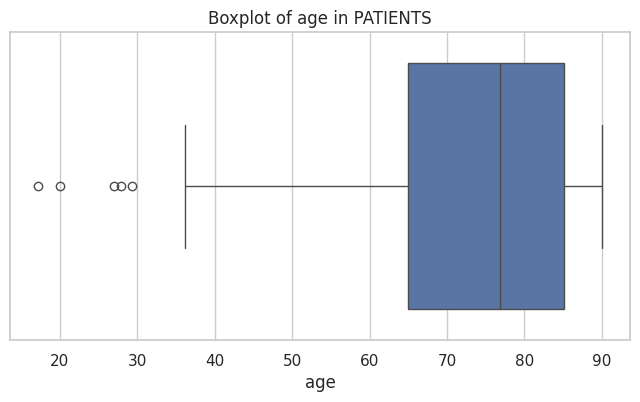

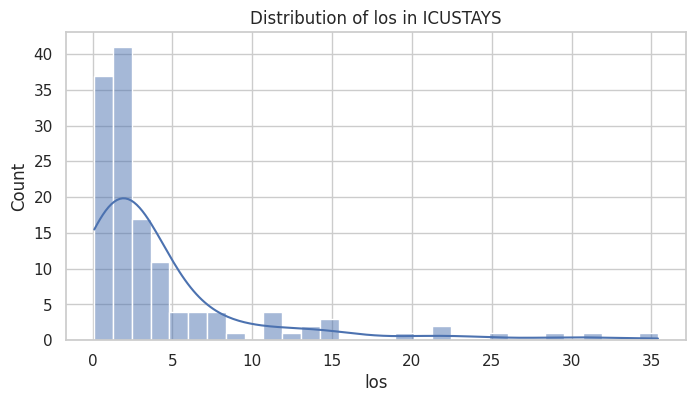

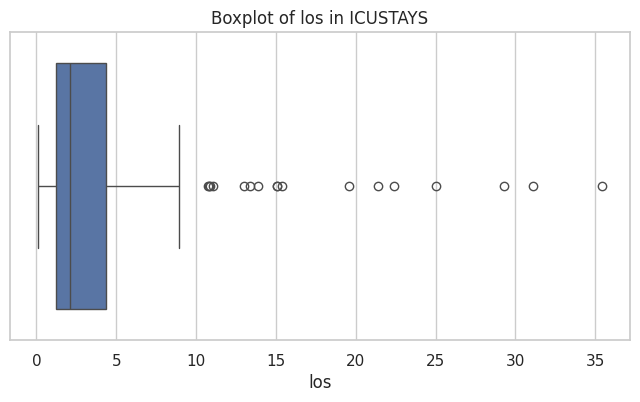

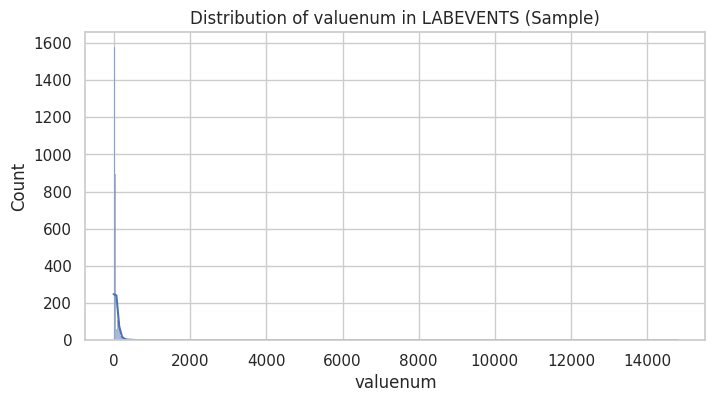

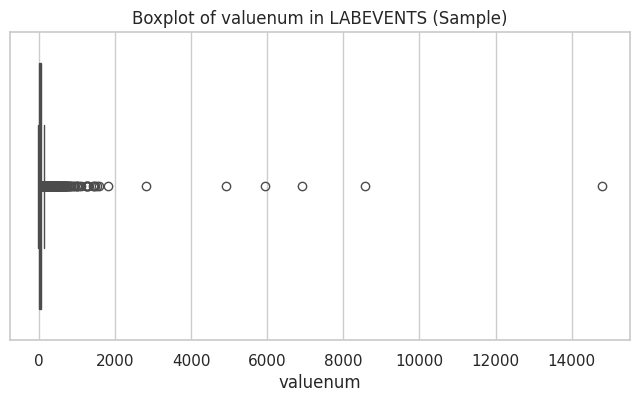

In [ ]:

def plot_distributions(df, columns, name):
    for col in columns:
        if df[col].dtype in ['float64', 'int64']:
            plt.figure(figsize=(8, 4))
            sns.histplot(df[col].dropna(), kde=True)
            plt.title(f"Distribution of {col} in {name}")
            plt.show()

            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[col].dropna())
            plt.title(f"Boxplot of {col} in {name}")
            plt.show()


patients['dob'] = pd.to_datetime(patients['dob'], errors='coerce')
age_calculator = AgeCalculator(patients, admissions)
admissions_with_age = age_calculator.add_age_to_admissions()
patients = patients.merge(
    admissions_with_age[['subject_id', 'age']].drop_duplicates('subject_id'),
    on='subject_id',
    how='left'
)
plot_distributions(patients, ['age'], 'PATIENTS')

plot_distributions(icustays, ['los'], 'ICUSTAYS')

plot_distributions(labevents_sample, ['valuenum'], 'LABEVENTS (Sample)')

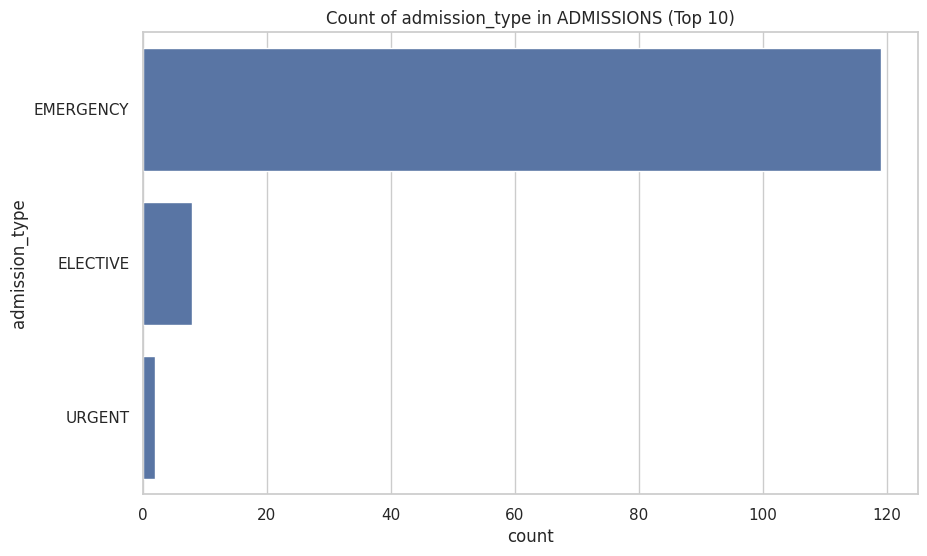

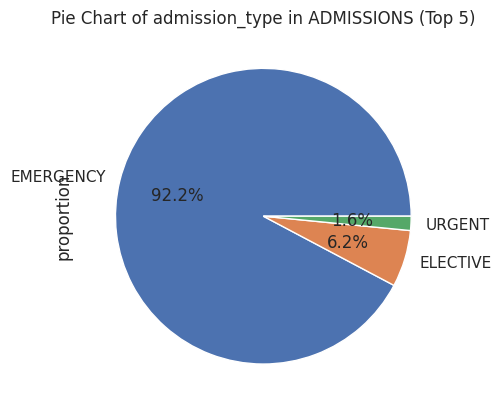

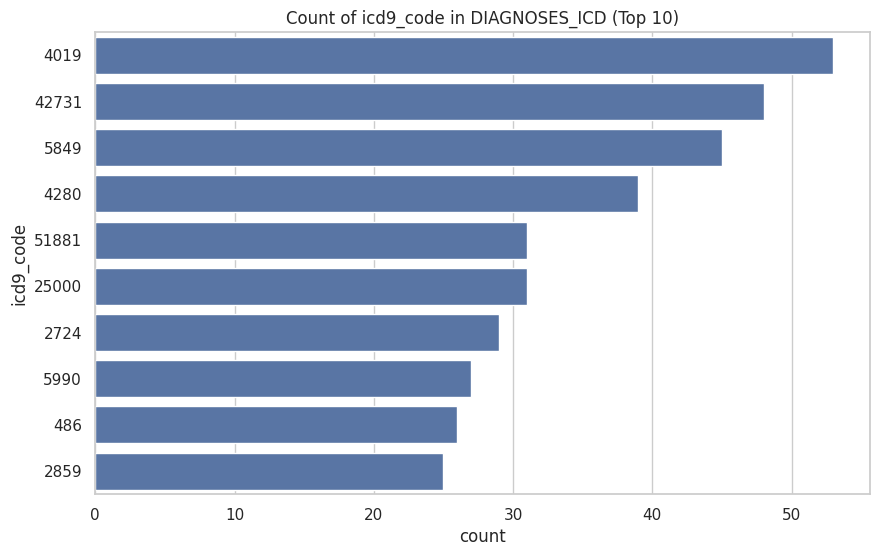

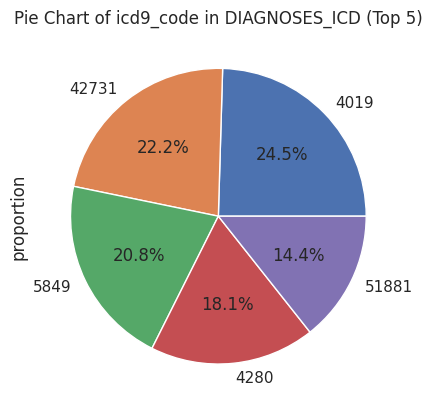

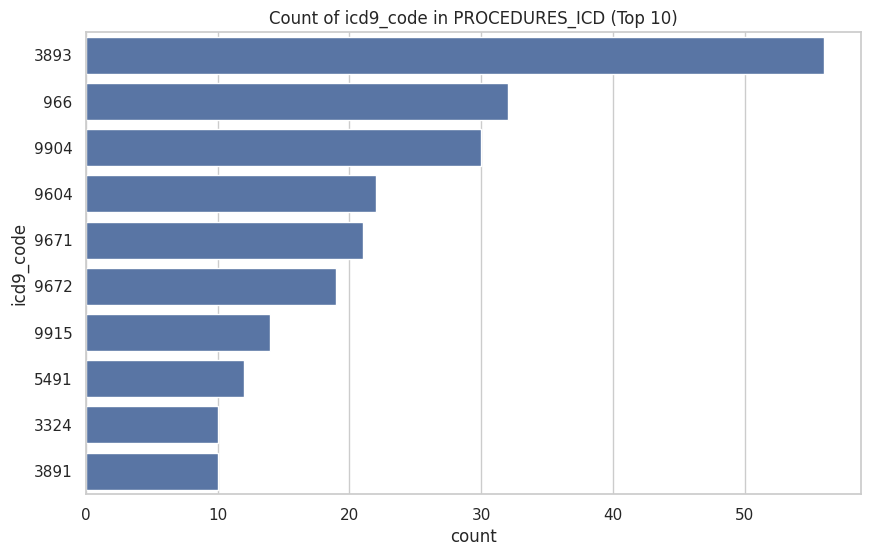

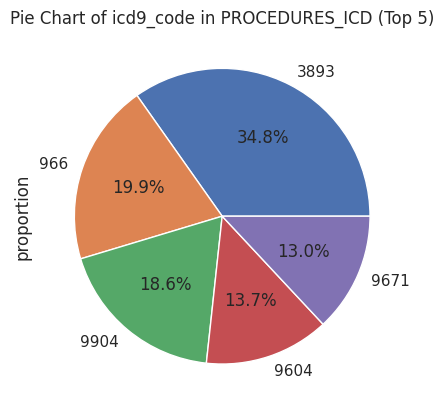

In [ ]:

def plot_categorical(df, column, name):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[column], order=df[column].value_counts().index[:10])  # Top 10
    plt.title(f"Count of {column} in {name} (Top 10)")
    plt.show()

    df[column].value_counts(normalize=True)[:5].plot.pie(autopct='%1.1f%%')  # Top 5 pie
    plt.title(f"Pie Chart of {column} in {name} (Top 5)")
    plt.show()

plot_categorical(admissions, 'admission_type', 'ADMISSIONS')

plot_categorical(diagnoses, 'icd9_code', 'DIAGNOSES_ICD')

plot_categorical(procedures, 'icd9_code', 'PROCEDURES_ICD')

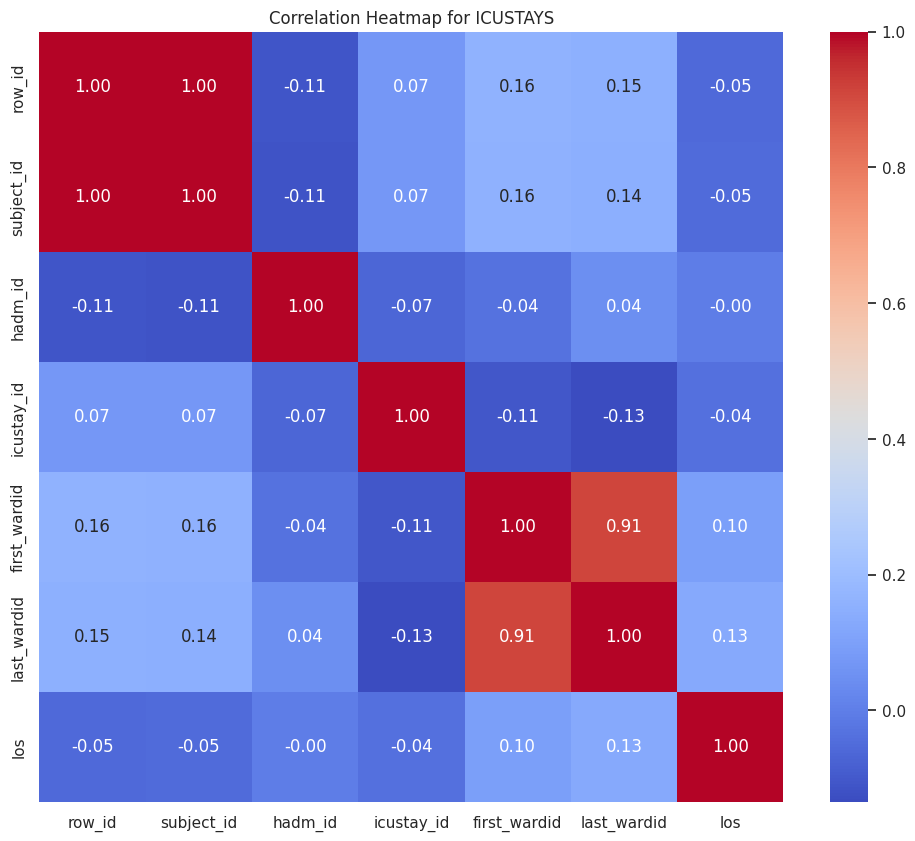

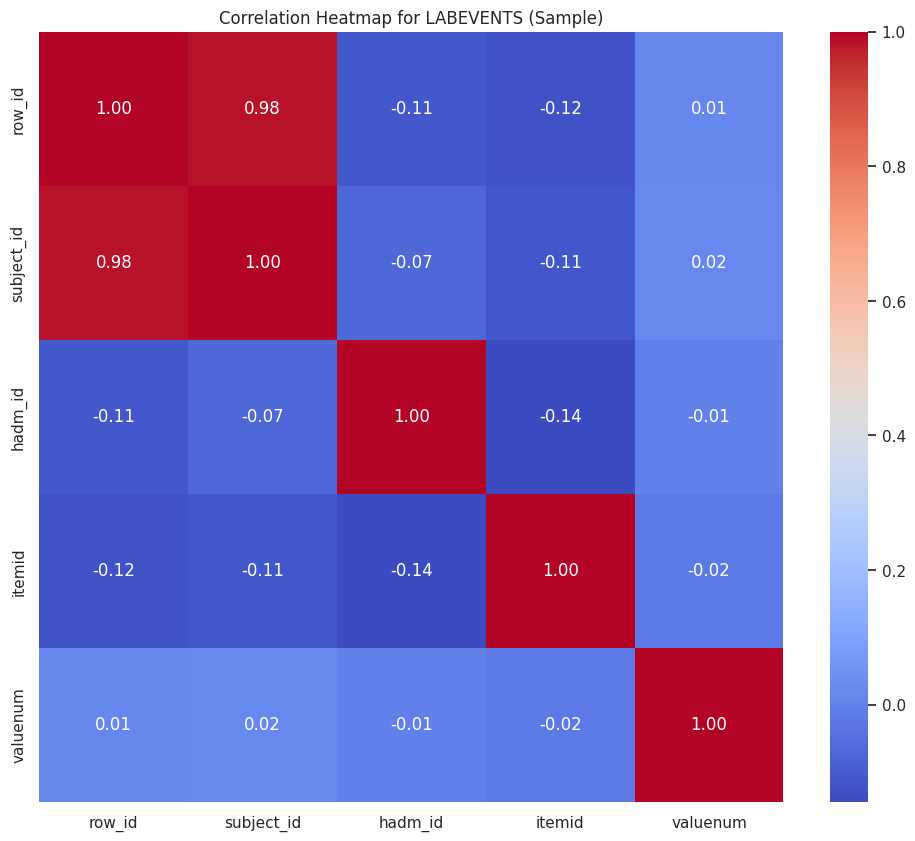

In [ ]:

def plot_correlation(df, name):
    corr = df.select_dtypes(include=['float64', 'int64']).corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Heatmap for {name}")
    plt.show()

plot_correlation(icustays, 'ICUSTAYS')

plot_correlation(labevents_sample, 'LABEVENTS (Sample)')


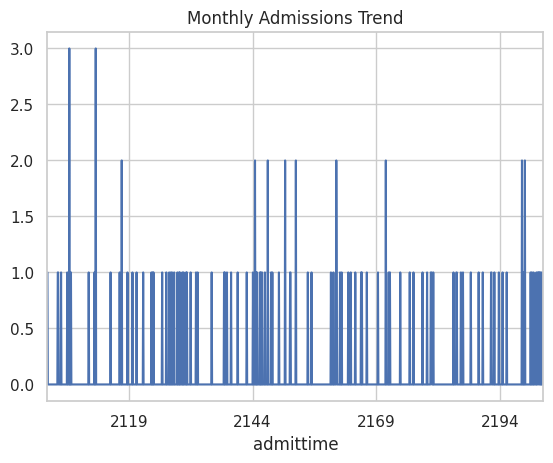

In [ ]:
admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions.set_index('admittime').resample('M').size().plot()
plt.title('Monthly Admissions Trend')
plt.show()

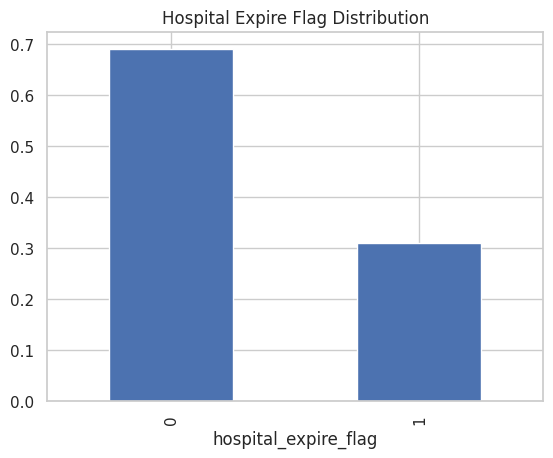

Index(['row_id_x', 'subject_id', 'gender', 'dob', 'dod', 'dod_hosp', 'dod_ssn',
       'expire_flag', 'age', 'row_id_y', 'hadm_id', 'admittime', 'dischtime',
       'deathtime', 'admission_type', 'admission_location',
       'discharge_location', 'insurance', 'language', 'religion',
       'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis',
       'hospital_expire_flag', 'has_chartevents_data'],
      dtype='object')


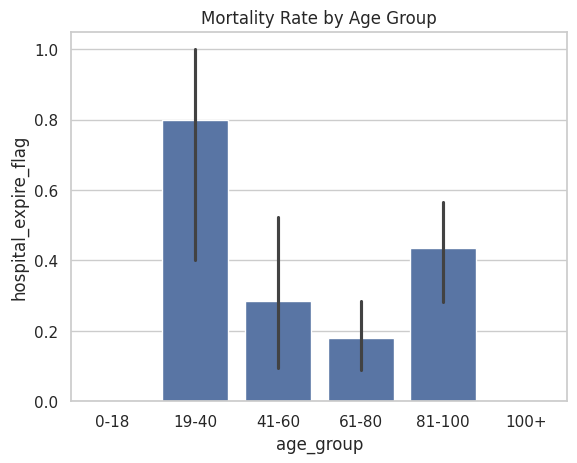

In [ ]:
merged = pd.merge(patients, admissions, on='subject_id')
merged['hospital_expire_flag'].value_counts(normalize=True).plot.bar()
plt.title('Hospital Expire Flag Distribution')
plt.show()

print(merged.columns)
merged['age_group'] = pd.cut(merged['age'], bins=[0, 18, 40, 60, 80, 100, np.inf], labels=['0-18', '19-40', '41-60', '61-80', '81-100', '100+'])
sns.barplot(x='age_group', y='hospital_expire_flag', data=merged)
plt.title('Mortality Rate by Age Group')
plt.show()

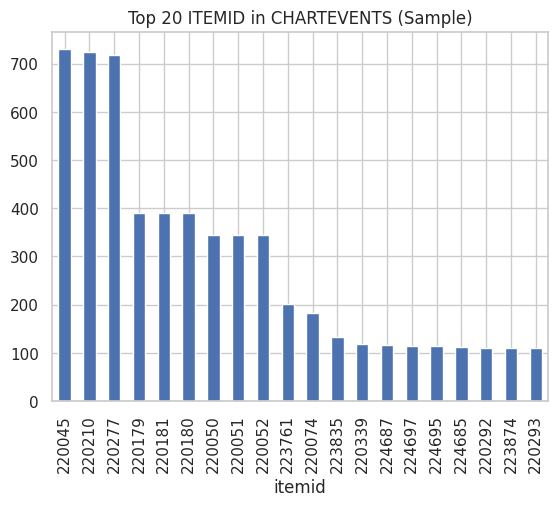

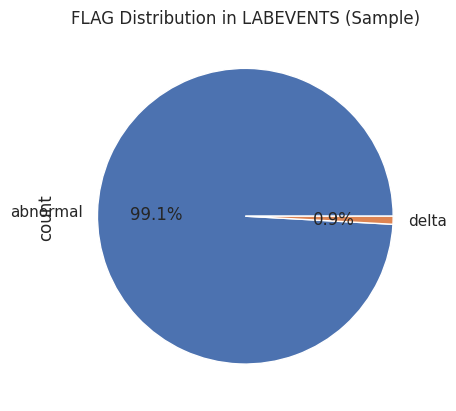

EDA Completed. Adjust chunksize or samples for larger datasets.


In [ ]:

itemid_counts = chartevents_sample['itemid'].value_counts()[:20]
itemid_counts.plot.bar()
plt.title('Top 20 ITEMID in CHARTEVENTS (Sample)')
plt.show()

labevents_sample['flag'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('FLAG Distribution in LABEVENTS (Sample)')
plt.show()

print("EDA Completed. Adjust chunksize or samples for larger datasets.")